In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [4]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [124]:
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [127]:
test1.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

In [128]:
test1.Garden.value_counts()

V    2240
O     825
Name: Garden, dtype: int64

In [45]:
des = pd.read_csv('VariableDescription.csv')

In [9]:
des

,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,duration of insurance policy in Olusola Insura...
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-N..."
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not ..."
6,Garden,building has garden or not (V-has garden; O-no...
7,Settlement,Area where the building is located. (R- rural ...
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


In [63]:
train1.Garden.unique()

array([None], dtype=object)

In [60]:
train1.Garden.value_counts()

Series([], Name: Garden, dtype: int64)

In [125]:
test1 = test.copy()

In [56]:
train1.Building_Painted = [0 if y=='N' else 1 for y in train1.Building_Painted]
train1.Building_Fenced = [0 if y=='N' else 1 for y in train1.Building_Fenced]
train1.Insured_Period = [1 if y>=0.5 else 0 for y in train1.Insured_Period]

In [126]:
test1.Building_Painted = [0 if y=='N' else 1 for y in test1.Building_Painted]
test1.Building_Fenced = [0 if y=='N' else 1 for y in test1.Building_Fenced]
test1.Insured_Period = [1 if y>=0.5 else 0 for y in test1.Insured_Period]

In [58]:
train1['Garden'] = train1['Garden'].fillna(train1['Garden'].mode(), inplace = True)

In [65]:
train3 = train2.copy()

In [69]:
train2['Garden'].fillna?

Object `fillna` not found.


In [70]:
train2.fillna?

In [74]:
train2.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  0
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [78]:
mis = train3['Garden']

In [79]:
mis.fillna('O', inplace=True)

In [129]:
miss = test1['Garden']
miss.fillna('O', inplace=True)

In [80]:
train3.Garden.unique()

array(['V', 'O'], dtype=object)

In [130]:
test1.Garden.unique()

array(['O', 'V'], dtype=object)

In [83]:
train3.Garden = [0 if y=='V' else 1 for y in train3.Garden]

In [131]:
test1.Garden = [0 if y=='V' else 1 for y in test1.Garden]

In [85]:
train4=train3.copy()

In [88]:
train3.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1,0,0,1,0,1,290.0,1,1960.0,.,1053,0
1,H2037,2015,1,0,1,0,1,1,490.0,1,1850.0,4,1053,0
2,H3802,2014,1,0,0,1,0,1,595.0,1,1960.0,.,1053,0
3,H3834,2013,1,0,1,1,0,1,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1,0,1,0,1,1,680.0,1,1800.0,3,1053,0


In [132]:
test1.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1,0,1,0,1,R,300.0,1,1960.0,3,3310
1,H11921,2016,1,0,1,0,1,R,300.0,1,1960.0,3,3310
2,H9805,2013,0,0,1,1,0,U,790.0,1,1960.0,.,3310
3,H7493,2014,1,0,1,0,1,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1,0,1,0,1,R,1405.0,1,2004.0,3,3321


In [86]:
train3.Settlement.unique()

array(['U', 'R'], dtype=object)

In [87]:
train3.Garden = [0 if y=='U' else 1 for y in train3.Garden]

In [90]:
train3.Claim.value_counts()

0    5526
1    1634
Name: Claim, dtype: int64

In [91]:
des

,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,duration of insurance policy in Olusola Insura...
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-N..."
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not ..."
6,Garden,building has garden or not (V-has garden; O-no...
7,Settlement,Area where the building is located. (R- rural ...
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


In [111]:
train3.YearOfObservation.unique()

array([2013, 2015, 2014, 2012, 2016], dtype=int64)

In [94]:
train3=train3.drop(['Geo_Code'], axis = 1)

In [95]:
train3.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  0
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Claim                   0
dtype: int64

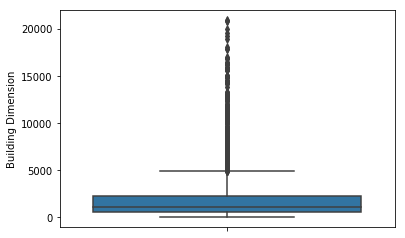

In [107]:
sns.boxplot(y = 'Building Dimension', data = train3)

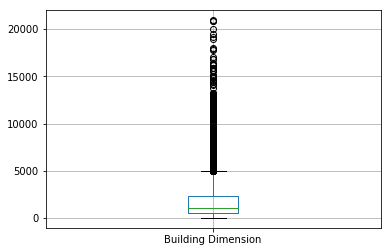

In [153]:
train3.boxplot(column='Building Dimension')


In [104]:
data = train3.copy()

In [ ]:
Q1 = train3['Date_of_Occupancy'].quantile(0.25)
 

In [ ]:
Q3 = train3['Date_of_Occupancy'].quantile(0.75)
IQR = Q3 - Q1



In [ ]:
filter = (train3['Date_of_Occupancy'] >= Q1 - 1.5 * IQR) & (df['AVG'] <= Q3 + 1.5 *IQR)
df.loc[filter] 

In [108]:
train3.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Claim'],
      dtype='object')

In [112]:
X = train3[['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type']]
y = train3['Claim']

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(10).plot(kind = 'barh')
plt.show()

[0.05621004 0.18462051 0.06681573 0.09358034 0.06615268 0.
 0.         0.33785874 0.19476187]


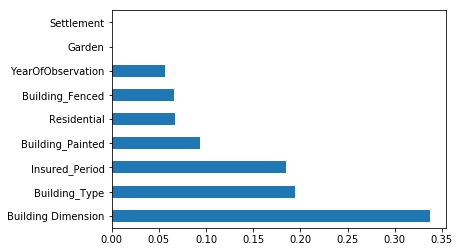

In [114]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(10).plot(kind = 'barh')
plt.show()

In [ ]:
X = train3[['YearOfObservation','Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type']]
y = train3['Claim']

In [154]:
X = train3[['Insured_Period', 'Building Dimension', 'Building_Type']]
y = train3['Claim']

In [152]:
X.isnull().sum()

Insured_Period          0
Building Dimension    106
Building_Type           0
dtype: int64

In [199]:
X_train = train3[['Insured_Period', 'Building Dimension', 'Building_Type']]
y_train = train3['Claim']
X_test = test1[['Insured_Period', 'Building Dimension', 'Building_Type']]

In [134]:
X_test

,Insured_Period,Building_Painted,Building Dimension,Building_Type
0,1,1,300.0,1
1,1,1,300.0,1
2,0,1,790.0,1
3,1,1,1405.0,1
4,1,1,1405.0,1
5,1,1,3225.0,2
6,1,0,31.0,2
7,1,1,1400.0,2
8,1,1,1300.0,2
9,1,0,1200.0,2


In [155]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [200]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [156]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [201]:
from xgboost import XGBClassifier
classifier = XGBClassifier(base_score=0.5,n_estimators=350,max_depth=3,learning_rate=0.1,min_child_weight=4)
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=4, missing=None, n_estimators=350, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [202]:
y_pred = classifier.predict(X_test)

In [198]:
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))
print('Precision:',metrics.precision_score(y_test,y_pred))
print('Recall:',metrics.recall_score(y_test,y_pred))
print('f1:',metrics.f1_score(y_test,y_pred))
print('confusion matrix:',metrics.confusion_matrix(y_test,y_pred))

Accuracy: 0.7835195530726257
Precision: 0.6017699115044248
Recall: 0.2042042042042042
f1: 0.30493273542600896
confusion matrix: [[1054   45]
 [ 265   68]]


In [138]:
train1.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [203]:
dictionary = {'Customer Id':test.iloc[:,0],'Claim':y_pred}

In [204]:
predicted = pd.DataFrame(dictionary)

In [205]:
predicted.to_csv('predicted2.csv',index = False)